<a href="https://colab.research.google.com/github/ShivajiMallela/Finetuning_YOLO/blob/main/YOLO_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🔍 YOLO Object Detection Tutorial

**Author:** Shivaji Mallela


This tutorial is part of a research effort supported by the National Science Foundation under grants **#2003740** and **#2435093** *(PI: Dr. Olcay Kursun, Auburn University at Montgomery)*. Our broader research explores the use of deep learning across diverse datasets, including texture images, hyperspectral imagery, tactile signal data, and bacteria colony images captured with cellphone cameras (some examples are shown below).


In this notebook, we’ll demonstrate how to use **YOLO (You Only Look Once)** for object detection using simpler, easy-to-understand image datasets. While the examples have been simplified for educational purposes, the techniques covered here are applicable to more complex and specialized datasets used in ongoing research.

## What is YOLO?

YOLO stands for You Only Look Once. It is a real-time object detection model that detects objects in an image in one go. Unlike older methods that first locate objects and then classify them, YOLO does everything in one single step — making it fast and accurate.

### ✅ Install YOLOv8 by Ultralytics
First, we install the Ultralytics package that provides YOLOv8.

v8 represents the version of the YOLO

there are total 11 versions of YOLO, we are using version 8

Before running the below code cell, Change runtime type to access the GPU in the colab

GO TO:

`Runtime > Change runtime type > Hardware accelerator: T4 GPU`

In [1]:
# Install Ultralytics - it provides YOLOv8 out of the box
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 868.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [2]:
from google.colab import drive

# Connect your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now you can access the files in your drive through `📁 (files icon)` located at the

left side (👈) of your colab notebook.

The YOLO model is originally trained to detect and classify 80 different objects (referred to as classes). Now, let's find out what those 80 classes are.

In [3]:
# import the YOLO model
from ultralytics import YOLO

# Load the pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Get the class names
class_names = model.names

class_list = list(class_names.items())

# Print in 2 columns
for i in range(0, len(class_list), 2):
    left = f"{class_list[i][0]:>2}: {class_list[i][1]:<15}"
    if i+1 < len(class_list):
        right = f"{class_list[i+1][0]:>2}: {class_list[i+1][1]:<15}"
    else:
        right = ""
    print(f"{left}    {right}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 116MB/s]

 0: person              1: bicycle        
 2: car                 3: motorcycle     
 4: airplane            5: bus            
 6: train               7: truck          
 8: boat                9: traffic light  
10: fire hydrant       11: stop sign      
12: parking meter      13: bench          
14: bird               15: cat            
16: dog                17: horse          
18: sheep              19: cow            
20: elephant           21: bear           
22: zebra              23: giraffe        
24: backpack           25: umbrella       
26: handbag            27: tie            
28: suitcase           29: frisbee        
30: skis               31: snowboard      
32: sports ball        33: kite           
34: baseball bat       35: baseball glove 
36: skateboard         37: surfboard      
38: tennis racket      39: bottle         
40: wine glass         41: cup            
42: fork               43: knife          
44: spoon              45: bowl           
46: banana 

Above, we see the 80 different classes on which the model is trained. It starts with 0 (person) and ends at 79 (toothbrush).

The model has already been trained and is available as open-source, which we can use directly by importing it from a library called Ultralytics.

Now, let's see how it works.

Let's take an image that includes one of these 80 classes.

For example, we'll use an image of a dog from Google:

https://cdn.royalcanin-weshare-online.io/pCJJPmYBaxEApS7LeAbn/v1/ed7h-how-to-buy-a-puppy-hero-dog?w=1440&fm=jpg&auto=format%2Ccompress

Lets download the image

In [4]:
# Downloading the image and name it as puppy.jpg
import requests

# Direct image URL (must end with .jpg, .png, etc.)
url = "https://cdn.royalcanin-weshare-online.io/pCJJPmYBaxEApS7LeAbn/v1/ed7h-how-to-buy-a-puppy-hero-dog?w=1440&fm=jpg&auto=format%2Ccompress"

# Send a request to the URL
response = requests.get(url)

# Save the image as a file
with open("puppy.jpg", "wb") as f:
    f.write(response.content)

Let's display the downloaded image using Matplotlib

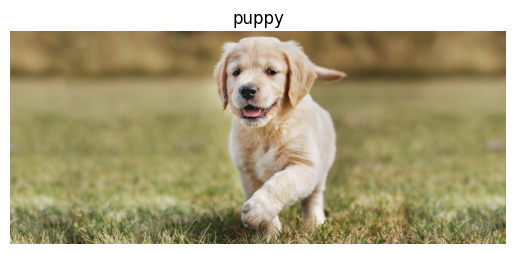

In [5]:
# Display the image
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("puppy.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("puppy")
plt.show()

Now we'll use this image to test the YOLO model that we imported

In [6]:
# test the model and save the results in a variable named `output`.
output = model.predict(source="/content/puppy.jpg", save=True)


image 1/1 /content/puppy.jpg: 288x640 1 dog, 47.4ms
Speed: 11.2ms preprocess, 47.4ms inference, 361.7ms postprocess per image at shape (1, 3, 288, 640)
Results saved to runs/detect/predict


Now our results are saved in the `runs/detect/predict`

Let's look at the output of the YOLO model

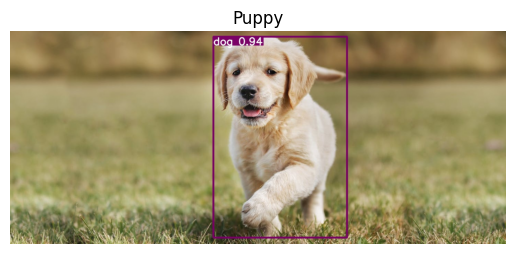

In [7]:
# Display the image
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/runs/detect/predict/puppy.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("Puppy")
plt.show()

So YOLO model detects the dog in the given image and also plots the box around that.

What we did above was to provide an image to the YOLO model, and the model output indicated that the image contains a dog. It also plotted a box around the dog and displayed that the model is 94% (0.94) confident in its prediction.

But where is all this information stored?

The information is stored in a variable named `output`. In the code cell above, where we provided the image to the YOLO model, we stored the results of the predictions in a variable called `output`. So, let's take a look at the `output`.

In [8]:
# Let's look at what is in the 'output' variable

output[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([16.], device='cuda:0')
conf: tensor([0.9408], device='cuda:0')
data: tensor([[5.9068e+02, 1.6834e+01, 9.7866e+02, 5.9854e+02, 9.4084e-01, 1.6000e+01]], device='cuda:0')
id: None
is_track: False
orig_shape: (617, 1440)
shape: torch.Size([1, 6])
xywh: tensor([[784.6732, 307.6861, 387.9768, 581.7052]], device='cuda:0')
xywhn: tensor([[0.5449, 0.4987, 0.2694, 0.9428]], device='cuda:0')
xyxy: tensor([[590.6848,  16.8335, 978.6616, 598.5387]], device='cuda:0')
xyxyn: tensor([[0.4102, 0.0273, 0.6796, 0.9701]], device='cuda:0')

Let's understand `output`:

`cls` - Class: This represents the class number that the model predicted. Here, it predicted class 16, which corresponds to a dog among the 80 classes.

`conf` - Confidence Score: This indicates how confident the model is about the predicted class.

`xywhn` - X_center, Y_center, Width, Height, n(normalized): These are the coordinates of the box that is drawn around the dog.

### Testing YOLO with an object that is not among the 80 classes

What if we provide an image that contains an object not among the 80 classes that the model is trained on?

What will the result be?

Let's take an image of a watermelon from Google and try it with the YOLO model!

https://i.ytimg.com/vi/3f967i5mHQI/maxresdefault.jpg

In [9]:
# Downloading the image and name it as watermelon.jpg
import requests

# Direct image URL (must end with .jpg, .png, etc.)
url = "https://i.ytimg.com/vi/3f967i5mHQI/maxresdefault.jpg"

# Send a request to the URL
response = requests.get(url)

# Save the image as a file
with open("watermelon.jpg", "wb") as f:
    f.write(response.content)

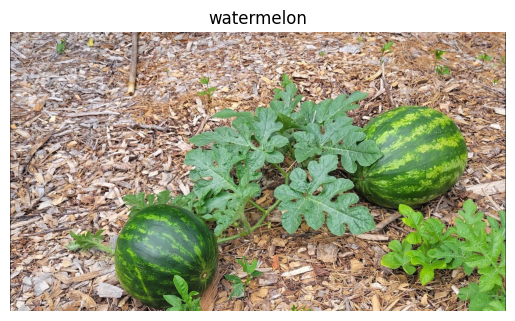

In [10]:
# Display the image
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("watermelon.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("watermelon")
plt.show()

In [11]:
# test the model and save the results in a variable named `output_2`.
output_2 = model.predict(source="/content/watermelon.jpg", save=True)


image 1/1 /content/watermelon.jpg: 384x640 1 vase, 61.7ms
Speed: 2.5ms preprocess, 61.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


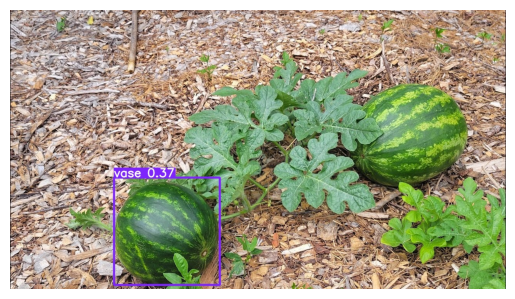

In [12]:
# Display the image
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/runs/detect/predict/watermelon.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

Here if we see, the YOLO model was only able to detect one watermelon and it classified the detected part in the image as `vase` instead of `watermelon`.

There's nothing wrong with the model here. The issue is that it only recognizes the 80 objects it has been trained on. So, whenever we provide an image, the model attempts to identify any of the trained objects and classifies it based on its training.

To overcome this limitation, we can use a method called `Finetuning`. This means we can take the existing model and train it further with a desired dataset to enable it to recognize new objects.

Since we need the model to detect watermelons, we will now train it using images of watermelons. This way, the model will be able to detect and classify all the watermelons in the image.

In order to train the model we need to have the dataset that contains watermelon images.

please access the below link to get the data:

https://universe.roboflow.com/vietnamese-fruit-dectection-xi3gb/water-melon-detection--single-object/dataset/1

Please download the dataset from the link and upload it in your drive

## Finetuning YOLO

In [13]:
from ultralytics import YOLO

model = YOLO(model='yolov8n.pt')

model.train(data="/content/drive/MyDrive/watermelon_dataset/data.yaml", epochs=10) # insert the path of "data.yml" file from your drive

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/watermelon_dataset/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

100%|██████████| 755k/755k [00:00<00:00, 20.2MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 95.9MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/watermelon_dataset/train/labels.cache... 475 images, 0 backgrounds, 0 corrupt: 100%|██████████| 475/475 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/watermelon_dataset/valid/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.01G       1.33      3.013      2.044         12        640: 100%|██████████| 30/30 [00:13<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]


                   all         45         48    0.00346      0.963       0.59      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.49G      1.131      2.095      1.718         12        640: 100%|██████████| 30/30 [00:09<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         45         48      0.659      0.555      0.665      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.49G      1.098      1.778      1.676         12        640: 100%|██████████| 30/30 [00:10<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         45         48      0.895      0.863      0.942      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.51G      1.036      1.516      1.602         13        640: 100%|██████████| 30/30 [00:07<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         45         48      0.746      0.887      0.916      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.51G     0.9891       1.39      1.572         12        640: 100%|██████████| 30/30 [00:08<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         45         48      0.882      0.975      0.977      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.51G     0.9053      1.199      1.474         11        640: 100%|██████████| 30/30 [00:09<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         45         48      0.922      0.975      0.974      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.51G     0.8837      1.131      1.441         12        640: 100%|██████████| 30/30 [00:08<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         45         48      0.971      0.966      0.981      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.51G     0.8254       1.03      1.392         11        640: 100%|██████████| 30/30 [00:07<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         45         48      0.934      0.966      0.977      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.53G     0.7683     0.9096      1.338         11        640: 100%|██████████| 30/30 [00:09<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


                   all         45         48      0.945      0.968      0.972      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.53G     0.7571     0.8588      1.302         14        640: 100%|██████████| 30/30 [00:09<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]

                   all         45         48      0.896      0.986      0.973      0.745



10 epochs completed in 0.034 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]


                   all         45         48      0.896      0.986      0.973      0.745
            watermelon         37         40      0.907      0.971      0.965      0.742
       watermelon-peel          8          8      0.885          1      0.982      0.748
Speed: 0.2ms preprocess, 3.0ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ad951b31750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

After the Model training was successfully completed. Test the model with the same watermelon image and see what it does.

In [14]:
output_3 = model.predict(source="/content/watermelon.jpg", save=True)


image 1/1 /content/watermelon.jpg: 384x640 2 watermelons, 10.4ms
Speed: 3.2ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/train2


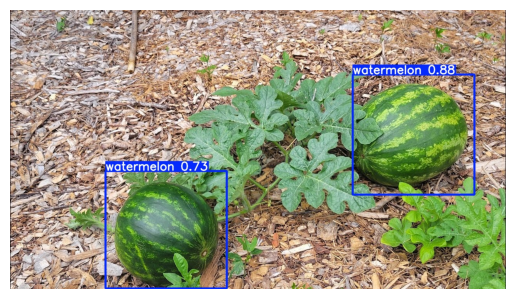

In [16]:
# Display the image
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/runs/detect/train2/watermelon.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

Great, Now the model was able to detect all the watermelon in the image and draw the box around them and classifying them as watermelon.

See below to know how this relates to the Bio medical experimentation

## Using YOLO Model for Colony Detection in Biomedical Imaging

In the context of biomedical imaging, instead of using images of watermelons as in the previous example, we utilize a large Bio medical dataset (https://www.nature.com/articles/s41597-023-02404-8) (contains bacterial plates) that is publicly available to train the YOLO model. This training enables the model to detect colonies in the provided images. However, unlike the previous example where the model classifies objects, here we are solely using the YOLO model to detect the colonies and create bounding boxes around them, without classifying what they are.

Here are some results from applying YOLO detection to images of bacterial colonies:

<img src="https://raw.githubusercontent.com/ShivajiMallela/Finetuning_YOLO/refs/heads/main/images/MixSp01_imgcrop.jpeg" width="300" height="300" style="margin-right: 10px;">
<img src="https://raw.githubusercontent.com/ShivajiMallela/Finetuning_YOLO/refs/heads/main/images/MixSp02_imgcrop.jpeg" width="300" height="300">


